# Tutorial pytorch (Regressão linear)

## Importando dependências

In [39]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

## Criando dataset 

In [17]:
x_values = list(range(11))
y_values = [2*i + 1 for i in x_values]

In [18]:
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

In [19]:
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

## Criando modelo

In [22]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        # Chamando o init da super classe
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        # Entrada para cada item do treinamento
        out = self.linear(x)
        return out

In [23]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [26]:
# Verificar se cuda está instalado
torch.cuda.is_available()

True

## Inicializando classe para calcular a perda (MSE)

In [27]:
criterion = nn.MSELoss()

## Inicializando o otmizador (Gradiente Descendente Estocástico)

In [40]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## Treinando o modelo

In [34]:
epochs = 100
for epoch in range(epochs):
    epoch += 1
    
    if torch.cuda.is_available():
        #Chamar função .cuda()
        inputs = Variable(torch.from_numpy(x_train))
        
    if torch.cuda.is_available():
        labels = Variable(torch.from_numpy(y_train))

    optimizer.zero_grad() 
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    

    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 0.12953627109527588
epoch 2, loss 0.12808966636657715
epoch 3, loss 0.12665918469429016
epoch 4, loss 0.12524503469467163
epoch 5, loss 0.12384629249572754
epoch 6, loss 0.12246347963809967
epoch 7, loss 0.12109574675559998
epoch 8, loss 0.11974350363016129
epoch 9, loss 0.11840645223855972
epoch 10, loss 0.11708417534828186
epoch 11, loss 0.1157766580581665
epoch 12, loss 0.11448383331298828
epoch 13, loss 0.11320551484823227
epoch 14, loss 0.11194118112325668
epoch 15, loss 0.11069128662347794
epoch 16, loss 0.10945525020360947
epoch 17, loss 0.10823298990726471
epoch 18, loss 0.10702424496412277
epoch 19, loss 0.10582929849624634
epoch 20, loss 0.10464733839035034
epoch 21, loss 0.10347892343997955
epoch 22, loss 0.10232331603765488
epoch 23, loss 0.10118074715137482
epoch 24, loss 0.10005071014165878
epoch 25, loss 0.0989333912730217
epoch 26, loss 0.09782881289720535
epoch 27, loss 0.09673620760440826
epoch 28, loss 0.09565597772598267
epoch 29, loss 0.09458796679973

/home/joker/virtualenvs/audio_processing/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


## Exibindo as predições

In [41]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[  0.61598778],
       [  2.67128897],
       [  4.72659016],
       [  6.78189135],
       [  8.83719254],
       [ 10.8924942 ],
       [ 12.94779491],
       [ 15.00309563],
       [ 17.05839729],
       [ 19.11369896],
       [ 21.16900063]], dtype=float32)

In [42]:
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

## Plotando o resultado

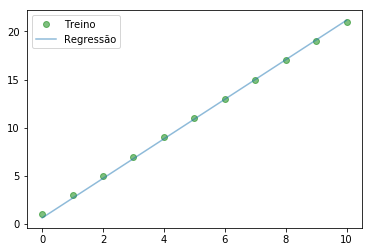

In [45]:
plt.clf()

predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_train, 'go', label="Treino", alpha=.5)
plt.plot(x_train, predicted, '-', label="Regressão", alpha=.5)

plt.legend(loc="best")
plt.show()

## Salvando e carregando modelo

In [47]:
torch.save(model.state_dict(), "models/regressao_linear.pkl")

In [48]:
model.load_state_dict(torch.load("models/regressao_linear.pkl"))